# Pymaceuticals Inc.
---

### Analysis

- The data below has led to various conclusions about the results for the SCC treatment experiment.  For instance, in the correlation and regression section, the data shows that under the Capomulin treatment, their is a strong correlation (0.84), between the weight and the average tumor volume of the mice.  There is evidence that the Capomulin treatment has been quite effective as the charts and statistics prove this.  The bar charts show that the Capomulin drug has the greatest number of timepoints of all of the drugs (meaning that the drug had the greatest number of mice to last through the experiment).  The summary statistics show Capomulin with the second lowest average tumor volume of all the drugs and the line plot displays that most of the mice using Capomulin have a decreasing tumor volume as the experiment carries on.  Based on the data below, Capomulin has proven to be one of the most effective drugs in the SCC treatment experiment. 
 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_study.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [26]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()

249

In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids =mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study.loc[mouse_study['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mouse_ids) == False]

# Can use clean_mouse_data[clean_mouse_data['Mouse ID'] == 'g989'] to check that the mouse id isn't in the dataframe
clean_mouse_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [30]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data['Mouse ID'].nunique()

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_TV = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_TV = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_TV = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_TV = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_TV = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume": mean_TV, "Median Tumor Volume": median_TV,
                              "Tumor Volume Variance": var_TV, "Tumor Volume Std. Dev.": std_TV,
                              "Tumor Volume Std. Err.": sem_TV})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_mouse_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [33]:
drug_df = clean_mouse_data.groupby(['Drug Regimen']).count()
drug_bar_df = drug_df.loc[:, 'Mouse ID']
drug_bar_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

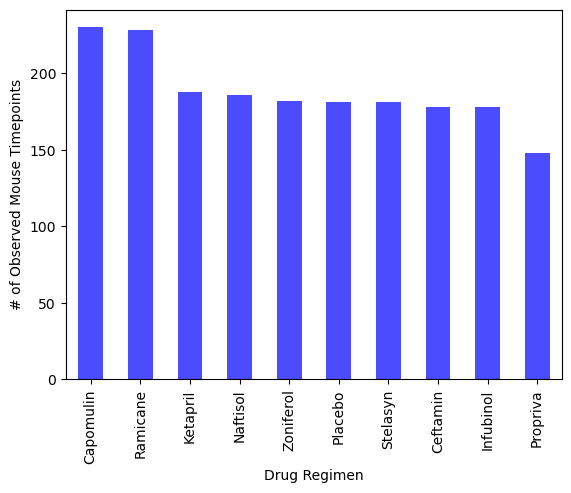

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_bar_df.sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.70, xlabel="Drug Regimen",
                                              ylabel="# of Observed Mouse Timepoints")

plt.show()

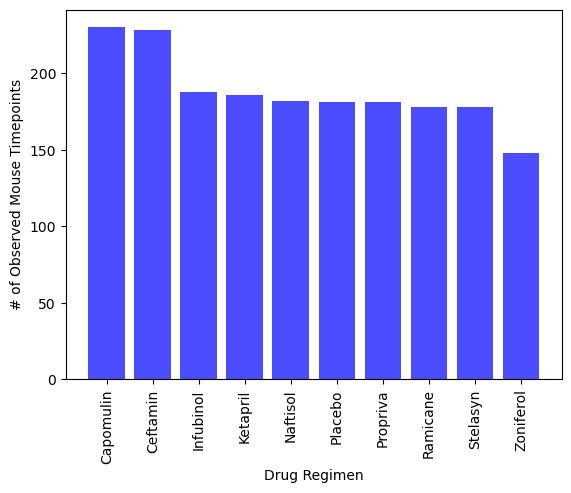

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# https://matplotlib.org/stable/gallery/ticks/ticklabels_rotation.html#sphx-glr-gallery-ticks-ticklabels-rotation-py

plt.bar(drug_df.index, drug_df['Mouse ID'].sort_values(ascending=False), color='blue', alpha=0.70)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(drug_df.index, rotation='vertical')
plt.show()

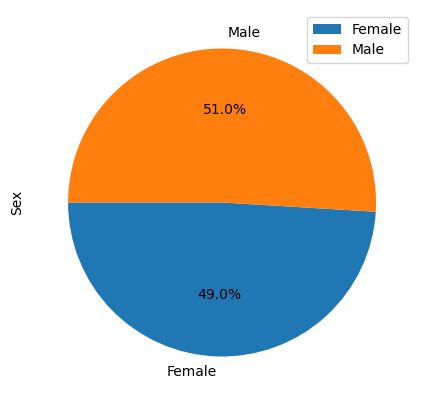

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_mouse_data.groupby(['Sex']).count()

sex_pie_plot = sex_df.plot(kind='pie', y='Mouse ID', ylabel="Sex", autopct='%1.1f%%', figsize=(5, 5), startangle=180)

plt.show()

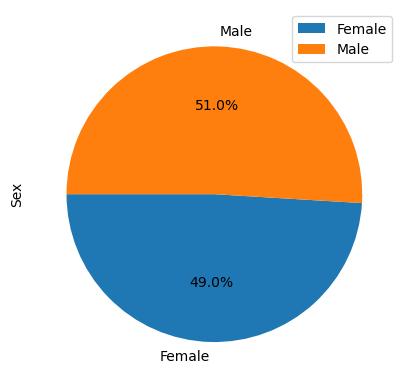

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df['Mouse ID'], labels=sex_df.index, autopct='%1.1f%%', startangle=180)

plt.ylabel("Sex")
plt.legend(loc='upper right')
figsize=(5,5)
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = clean_mouse_data.groupby(["Mouse ID"])['Timepoint'].max()
max_tp = max_tp.reset_index()
max_tp

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [39]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_max = pd.merge(max_tp, clean_mouse_data, on=['Mouse ID','Timepoint'], how="left")
merge_max

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tv_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_names:
    tumor_vol = merge_max.loc[merge_max['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tv_data.append(tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(drug)
    print(f"The lower quartile of the drug is: {lowerq}")
    print(f"The upper quartile of the drug is: {upperq}")
    print(f"The interquartile range of the drug is: {iqr}")
    print(f"The median of of the drug is: {quartiles[0.5]} ")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(outliers)

Capomulin
The lower quartile of the drug is: 32.37735684
The upper quartile of the drug is: 40.1592203
The interquartile range of the drug is: 7.781863460000004
The median of of the drug is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
The lower quartile of the drug is: 31.56046955
The upper quartile of the drug is: 40.65900627
The interquartile range of the drug is: 9.098536719999998
The median of of the drug is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
The lower quartile of the drug is: 54.04860769
The upper quartile of the drug is: 65.52574285
The interquartile range of the drug is: 11.477135160000003
The median of of the drug is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be ou

In [41]:
tv_data

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

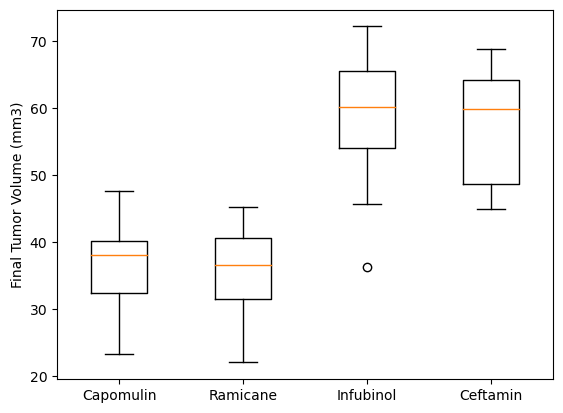

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tv_data, labels=drug_names)

plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

In [52]:
# Filter the clean dataframe for mice ids using Capomulin as reference.
clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


The mouse id selected is b128


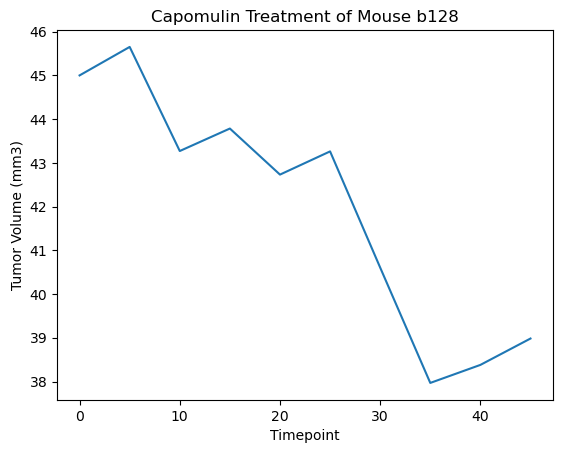

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Assume that input is a mouse id listed in Capomulin dataframe from the cell above.
m_id = input("What mouse id do you want to plot?")
print("The mouse id selected is " + m_id)

line_data = clean_mouse_data.loc[clean_mouse_data['Mouse ID'] == m_id, ('Timepoint', 'Tumor Volume (mm3)')]
line_data.set_index('Timepoint', inplace=True)

line_data.plot(kind='line', legend=False, ylabel="Tumor Volume (mm3)", title=f"Capomulin Treatment of Mouse {m_id}")

plt.show()

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Weight is the same for each mouse during the entire experiment
# Filter out the cleaned dataframe for only mice under Capomulin
capo_drug_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Need to gather the avg tumor volume for the mice in the Capomulin regimen
capo_scatter_data = capo_drug_df.groupby(['Mouse ID']).mean()
capo_scatter_data

C:\Users\yohan\AppData\Local\Temp\ipykernel_20740\3925373011.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capo_scatter_data = capo_drug_df.groupby(['Mouse ID']).mean()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


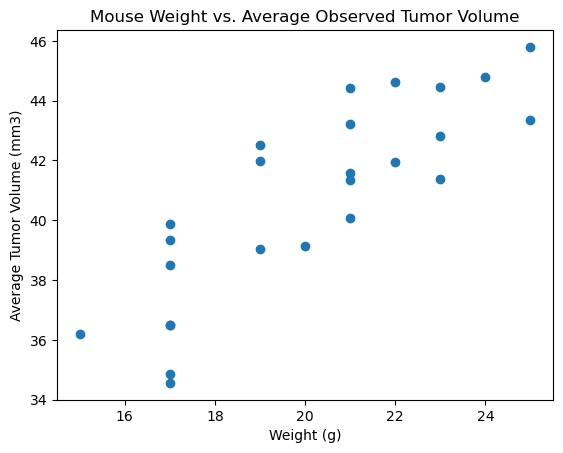

In [45]:
# Plot the scatter plot
plt.scatter(capo_scatter_data['Weight (g)'], capo_scatter_data['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume')

# capo_scatter_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)',
#                        title='Mouse Weight vs. Average Observed Tumor Volume')

plt.show()

## Correlation and Regression

The correlation between mouse weight vs. the average tumor volume is 0.84


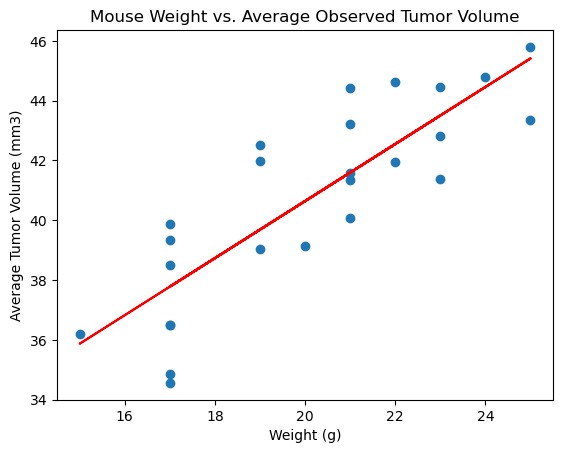

In [46]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate correlation coefficient between mouse weight and avg tumor volume
capo_weight = capo_scatter_data['Weight (g)']
capo_avg_tv = capo_scatter_data['Tumor Volume (mm3)']
correlation = st.pearsonr(capo_weight, capo_avg_tv)
print(f"The correlation between mouse weight vs. the average tumor volume is {round(correlation[0],2)}")

# Calculate linear regression
x_values = capo_scatter_data['Weight (g)']
y_values = capo_scatter_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Plot linear regression model
plt.scatter(capo_scatter_data['Weight (g)'], capo_scatter_data['Tumor Volume (mm3)'])
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume')

plt.show()